In [4]:
# 1. Imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 2. Load Titanic dataset
df = sns.load_dataset('titanic')

In [5]:
# 3. Basic Overview
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [6]:
# 4. Clean & Preprocess
# Fill missing 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' due to too many missing values
df.drop(columns='deck', inplace=True)

# Fill 'embark_town' and 'embarked' as needed
df['embark_town'].fillna(method='ffill', inplace=True)

# Drop rows with missing 'embarked' or 'age' just in case
df.dropna(subset=['embarked', 'age'], inplace=True)


/tmp/ipykernel_17981/1764631647.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipykernel_17981/1764631647.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [7]:
# 5. Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

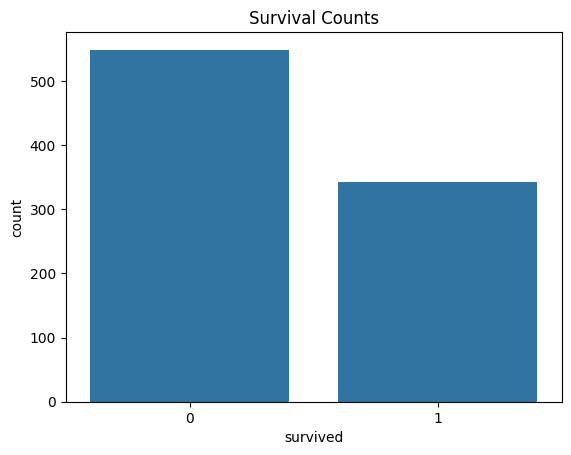

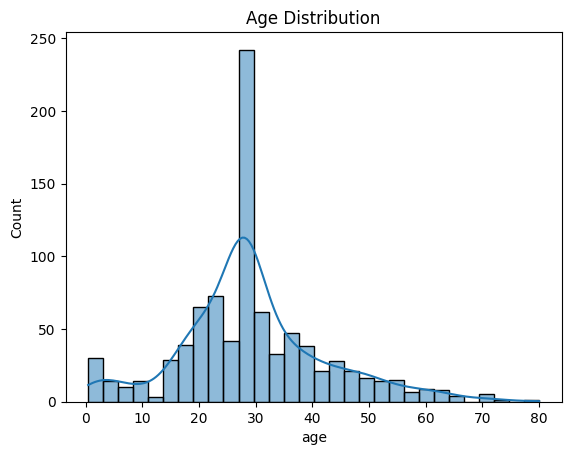

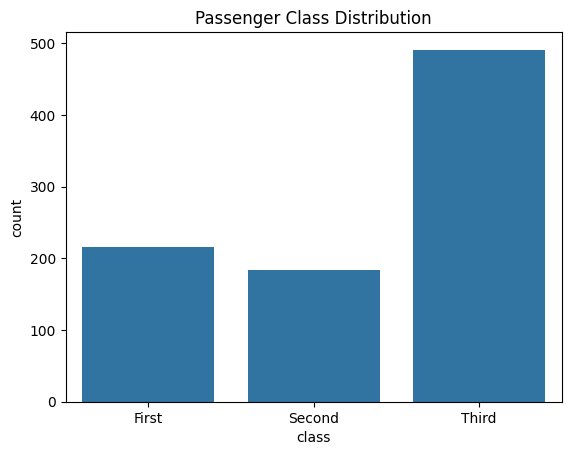

In [8]:
# 6. Univariate Plots
sns.countplot(x='survived', data=df)
plt.title('Survival Counts')
plt.show()

sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='class', data=df)
plt.title('Passenger Class Distribution')
plt.show()

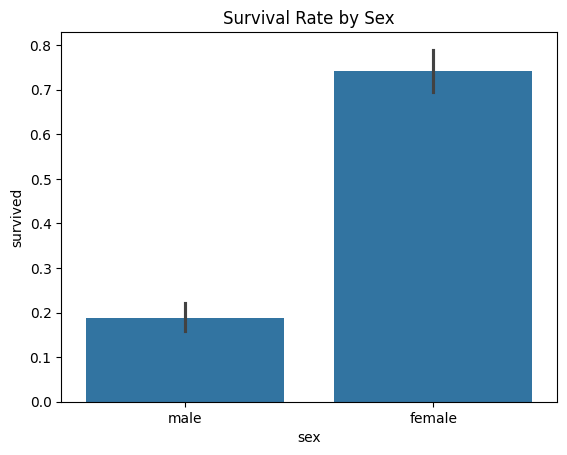

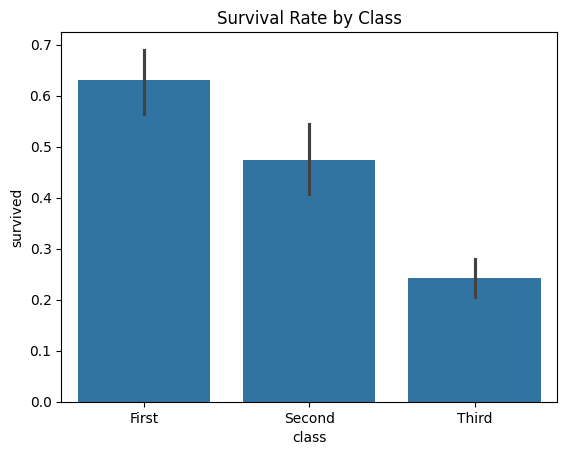

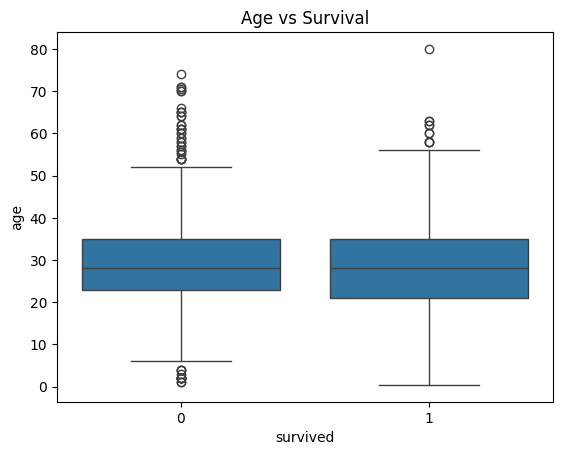

In [9]:
# 7. Bivariate Analysis
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

sns.barplot(x='class', y='survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survival')
plt.show()

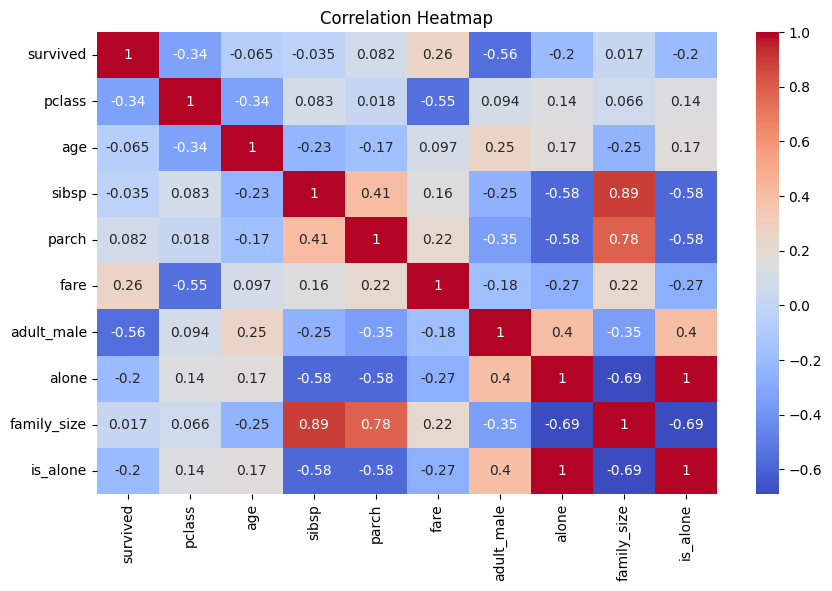

In [10]:
# 8. Multivariate Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

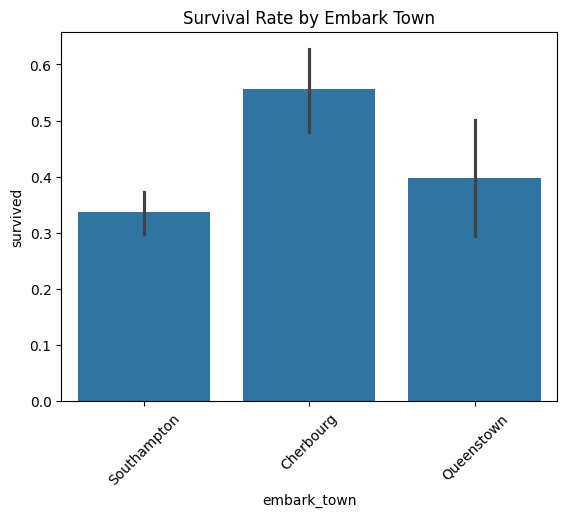

In [11]:
# 9. Survival by Embarked Town
sns.barplot(x='embark_town', y='survived', data=df)
plt.title('Survival Rate by Embark Town')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 10. Summary of Key Insights
print("Women had higher survival rates.")
print("Passengers in 1st class had better chances.")
print("Traveling alone lowered survival probability.")
print("Children had a higher survival rate on average.")

Women had higher survival rates.
Passengers in 1st class had better chances.
Traveling alone lowered survival probability.
Children had a higher survival rate on average.
